# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1: Is the distribution of body temperatures normal?

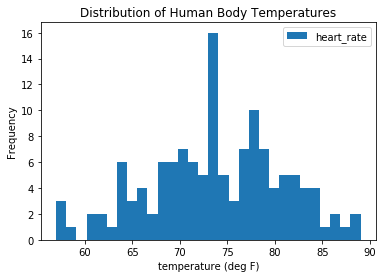

In [4]:
_ = df.plot.hist(x='temperature', bins=30, title='Distribution of Human Body Temperatures')
_ = plt.xlabel('temperature (deg F)')

At a first glance, this does not appear to be a normal distribution.

In [5]:
temp_avg = df.temperature.mean()
temp_std = df.temperature.std()
print(temp_avg, temp_std)

(98.24923076923078, 0.7331831580389454)


In [6]:
temp_percentiles = np.percentile(df.temperature, [0.15, 2.5, 16, 50, 84, 97.5, 99.85])

In [7]:
for idx, temp in enumerate(temp_percentiles):
    print("Percentile: " + str(temp),
          "Expected percentile (assuming normal): " + str(temp_avg + temp_std * (idx - 3)),
          "Difference: " + str(temp - temp_avg - temp_std * (idx - 3)))

('Percentile: 96.31935', 'Expected percentile (assuming normal): 96.0496812951', 'Difference: 0.26966870488605865')
('Percentile: 96.7225', 'Expected percentile (assuming normal): 96.7828644532', 'Difference: -0.060364453152890185')
('Percentile: 97.564', 'Expected percentile (assuming normal): 97.5160476112', 'Difference: 0.04795238880816077')
('Percentile: 98.3', 'Expected percentile (assuming normal): 98.2492307692', 'Difference: 0.050769230769219575')
('Percentile: 98.836', 'Expected percentile (assuming normal): 98.9824139273', 'Difference: -0.14641392726972446')
('Percentile: 99.4775', 'Expected percentile (assuming normal): 99.7155970853', 'Difference: -0.23809708530866214')
('Percentile: 100.6452', 'Expected percentile (assuming normal): 100.448780243', 'Difference: 0.19641975665238887')


These differences between the expected percentiles (if the distribution was normal) and the actual percentiles suggest that the normal distribution does not accurately model the data, especially around the tails.

In [8]:
print(df.temperature.max(), df.temperature.min())

(100.8, 96.3)


In [9]:
print((df.temperature.max() - temp_avg)/temp_std,
      (df.temperature.min() - temp_avg)/temp_std)

(3.479034130559948, -2.6585863953072972)


In [10]:
df.temperature.count()

130

According to the wikipedia article on Normality Tests, this back-of-the-envelope test suggests that because there is a 3 sigma event (the maximum) and there are significantly fewer than 300 events in the data, the normal distribution understates the expected maximum devations in the data. Simply put, the normal distribution is inaccurate.

# 2: Is the sample size large? Are the observations independent?

In [11]:
df.temperature.count()

130

The sample size is above 30, so the Central Limit Theorem should hold.

The data's description (http://jse.amstat.org/datasets/normtemp.txt) suggests that the data is a random sample, so I assume they made it less than 10% of the original dataset, so that the observations are independent.

# 3: Is the true population mean really 98.6 degrees F?

## Bootstrap Hypothesis Test: Resample the data (with replacement) and calculate the mean. Do this many times.

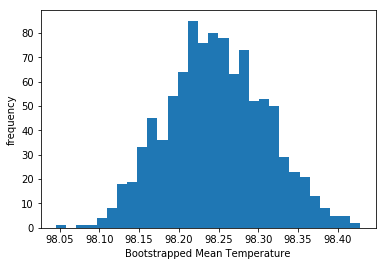

In [12]:
bootstrap_means = []
data = np.array(df.temperature)

for i in range(1000):
    bootstrap_data = np.random.choice(data, 130)
    bootstrap_means.append(np.mean(bootstrap_data))

_ = plt.hist(x=bootstrap_means, bins=30)
_ = plt.xlabel('Bootstrapped Mean Temperature')
_ = plt.ylabel('frequency')

It seems highly unlikely that 98.6 is the true population mean. That value didn't occur as the mean ever in 1000 tests.

## Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

I would use a 1-sample test, because the data naturally fits into one group. If I were comparing the means of female vs male temperatures, then I would use a 2-sample test.

## In this situation, is it appropriate to use the  t  or  z  statistic?

I would use the t-statistic, because this is a test about the mean, rather than a proportion.

H_o: The population has a mean of 98.6 deg F

H_a: The population does not have a mean of 98.6 deg F

alpha = 0.05

We can test this by seeing what the probability is of having a sample with mean 98.24 and std 0.073, given that the true population mean we have is 98.6.

We can do a t-test of the mean with 129 degrees of freedom.

In [13]:
true_mean = 98.6
sample_mean = df.temperature.mean()
sample_std = df.temperature.std()
sample_size = df.temperature.count()

In [14]:
t_statistic = (true_mean - sample_mean)/(sample_std / np.sqrt(sample_size))
print(t_statistic)

5.454823292364079


In [15]:
print("95% Confidence Interval for Temp Mean: " + str(sample_mean - 2 * sample_std/np.sqrt(sample_size)) +
     " to " + str(sample_mean + 2 * sample_std/np.sqrt(sample_size)))

95% Confidence Interval for Temp Mean: 98.120621935555 to 98.37783960290656


T tables say that for 100 degrees of freedom, a t-statistic of 4.05 suggests that there is a p-value of 0.0001. More degrees of freedom decrease the threshold t-statistic for the p-value of 0.0001, so we can reject the null hypothesis.

## Now try using the other test. How is the result be different? Why?

I don't understand this question. Neither using a z-statistic nor a 2 sample t-test are appropriate.

The z-statistic is reserved for questions about a population or sample proportion (between 0 and 1). Additionally, unless we know the population's standard deviation, we cannot calculate exact probabilities from it. The z-table will underestimate them.

The 2 sample t-test is for comparing data between two independent groups. This could be an option if we were comparing male and female body temperatures, and trying to see if there is a difference between their means, but that is not the question at hand.

# 4: Draw a small sample of size 10 from the data and repeat both frequentist tests.

## Which one is the correct one to use?

We still should use a 1-sample t-test, because this is a test about the population mean, with only 1 group.

In [16]:
temp_sample = df.temperature.sample(10, random_state=42)
sample_mean_min = temp_sample.mean()
sample_std_min = temp_sample.std()
sample_size_min = 10

In [17]:
t_stat_min = (true_mean - sample_mean_min)/(sample_std_min / np.sqrt(sample_size_min))
print(t_stat_min)

1.5606191828511506


A t-statistic of 1.56 and 9 degrees of freedom gives a p-value around 0.15 to have a difference in means as extreme as they are. The small sample size of this test prevents us from rejecting the null hypothesis that the population mean is not 98.6 def F.

## What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

The t-test lost its hypothesis rejecting power when the sample size became this small.

# 5: At what temperature should we consider someone's temperature to be "abnormal"?

## As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

## Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

A reasonable definition for 'abnormal' temperature seems to be a temperature that has less than a 5% chance of happening by chance, if temperatures can be approximated by a normal distribution. This 5% level is the normal rejection level, and can also be expressed as any temperature that is 2 sigma away from the mean.

For the bootstrap approach, I can get bootstrap samples and calculate bootstrap means and standard deviations, then take the average of many of those to use as my std to determine what is 'abnormal'. The confidence interval for one temperature is just the bootstrapped sample's standard deviation, because N=1.

In [18]:
bootstrap_means = []
bootstrap_stds = []

for i in range(1000):
    bootstrap = np.random.choice(data, 130)
    bootstrap_means.append(np.mean(bootstrap))
    bootstrap_stds.append(np.std(bootstrap))

In [19]:
print(np.mean(bootstrap_means), np.mean(bootstrap_stds))

(98.24668692307692, 0.724126259902918)


In [20]:
print("Normal temp range: " + str(np.mean(bootstrap_means) - 2*np.mean(bootstrap_stds)) + " to " +
      str(np.mean(bootstrap_means) + 2*np.mean(bootstrap_stds)))

Normal temp range: 96.79843440327109 to 99.69493944288276


Frequentist approach: take the mean and std of the sample. Then use the same formula.

In [21]:
print("Normal temp range: " + str(temp_avg - 2 * temp_std) + " to " +
     str(temp_avg + 2 * temp_std))

Normal temp range: 96.7828644532 to 99.7155970853


# 6: Is there a significant difference between males and females in normal temperature?

## What testing approach did you use and why?

The appropriate test to use is a t-test. We use a t-test because this is a test about the mean, not a proportion. We do a 2-sample test because we are testing if the means of two independent groups are actually different.

In [22]:
df_male = df[df.gender == 'M']
df_female = df[df.gender == 'F']

In [23]:
male_avg = df_male.temperature.mean()
male_std = df_male.temperature.std()
male_count = df_male.temperature.count()

female_avg = df_female.temperature.mean()
female_std = df_female.temperature.std()
female_count = df_female.temperature.count()

In [24]:
mean_diff = female_avg - male_avg
mean_diff

0.289230769230727

In [25]:
mean_diff_std = np.sqrt((female_std/np.mean(female_count))**2 + (male_std/np.mean(male_count))**2)
print(female_std, male_std, mean_diff_std)

(0.7434877527313665, 0.6987557623265908, 0.015697085651539017)


In [26]:
t_stat_2s = mean_diff / mean_diff_std
print(t_stat_2s)

18.4257623135521


In [27]:
dof = (female_count - 1) + (male_count - 1)
print(dof)

128


The t-statistic for 100 degrees of freedom at the p = 0.001 level is 3.390. Having even more degrees of freedom will lower the t-statistic threshold corresponding to 0.001, and our t-statistic is over 18. Thus, I think it is overwhelmingly likely that there is a difference between male and female body temperatures.

In [28]:
print(female_avg, male_avg)

(98.39384615384613, 98.1046153846154)


## Conclusion

The mean human body temperature is very unlikely to be 98.6 deg F. The 95% Confidence Interval for Temp Mean is 98.120621935555 to 98.37783960290656 def F. An interesting note about the mean, however, is that it is the midpoint of the means of the male and female participants' mean temperatures. The gender split in mean temperature is about 0.29 deg F, but is highly unlikely to be a random difference.